In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Load the dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
X = df.iloc[:, :-1].values

In [9]:
# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [13]:
# Train the DBSCAN model
eps_values = np.arange(0.2, 1.4, 0.2)
min_samples_values = range(2, 6)
silhouette_scores = []
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(X)
        if len(set(dbscan.labels_)) > 1:
            score = silhouette_score(X, dbscan.labels_)
        else:
            score = -1
        silhouette_scores.append(score)

# Find the optimal values of eps and min_samples
silhouette_scores = np.array(silhouette_scores).reshape(len(eps_values), len(min_samples_values))
i, j = np.unravel_index(np.argmax(silhouette_scores), silhouette_scores.shape)
optimal_eps = eps_values[i]
optimal_min_samples = min_samples_values[j]
print(f'Optimal eps: {optimal_eps}, Optimal min_samples: {optimal_min_samples}')

# Train the final DBSCAN model with optimal hyperparameters
dbscan = DBSCAN(eps=optimal_eps, min_samples=optimal_min_samples)
dbscan.fit(X)
n_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
print(f'Number of clusters: {n_clusters}')

Optimal eps: 0.8, Optimal min_samples: 2
Number of clusters: 297


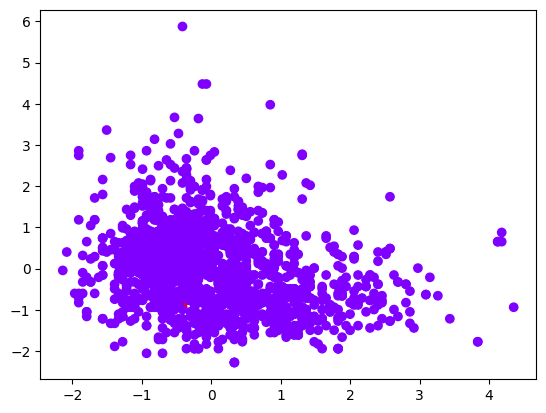

In [11]:
# Visualize the clusters
plt.scatter(X[:,0], X[:,1], c=labels, cmap='rainbow')
plt.show()

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

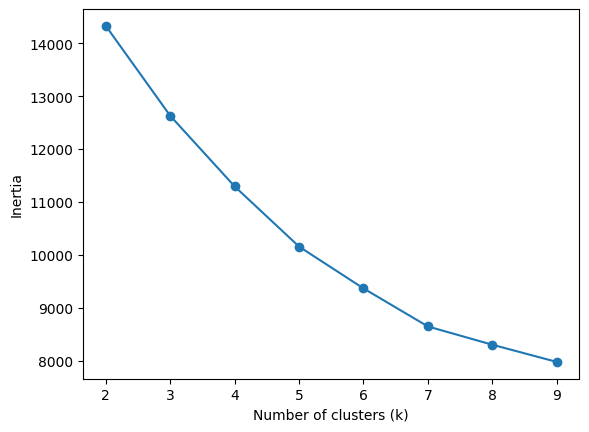

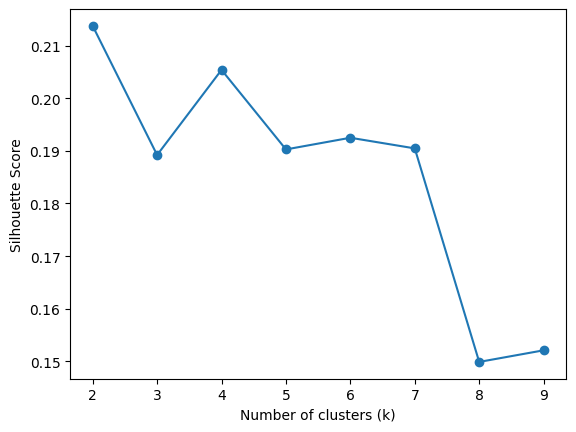

In [12]:
inertias = []
silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))
    
# Find the optimal value of k
plt.plot(range(2, 10), inertias, '-o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

plt.plot(range(2, 10), silhouette_scores, '-o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()